In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

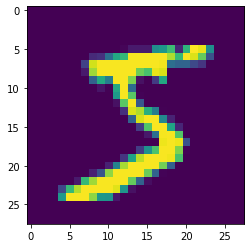

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255

In [7]:
X_test = X_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [9]:
28*28

784

In [10]:
784/2

392.0

In [11]:
X_train[0].shape

(28, 28)

In [12]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [13]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 25)                420625    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            421384    
Total params: 842,009
Trainable params: 842,009
Non-trainable params: 0
_________________________________________________________________


In [16]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
Total params: 420,625
Trainable params: 420,625
Non-trainable params: 0
__________________________________________________

In [17]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 421,384
Trainable params: 421,384
Non-trainable params: 0
________________________________________________

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(lr=1.5), metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss")

In [16]:
autoencoder.fit(X_train, X_train, epochs=200, validation_data=(X_test, X_test), callbacks=[early_stop], batch_size=1)

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2875 - accuracy: 0.0746 - val_loss: 0.2025 - val_accuracy: 0.1427
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1905 - accuracy: 0.1579 - val_loss: 0.1638 - val_accuracy: 0.1889
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1621 - accuracy: 0.1941 - val_loss: 0.1503 - val_accuracy: 0.2091
Epoch 4/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1459 - accuracy: 0.2176 - val_loss: 0.1368 - val_accuracy: 0.2221
Epoch 5/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1369 - accuracy: 0.2299 - val_loss: 0.1328 - val_accuracy: 0.2291
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1321 - accuracy: 0.2360 - val_loss: 0.1295 - val_accuracy: 0.2298
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1290 - accuracy: 0.2414 - val_loss: 0.1279 - val_ac

<AxesSubplot:>

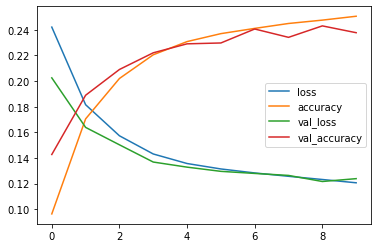

In [17]:
pd.DataFrame(autoencoder.history.history).plot()

In [18]:
passed_image = autoencoder.predict(X_test[:10])

original image


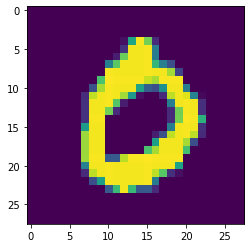

attempted image


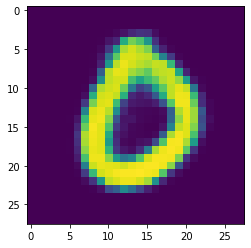

In [20]:
n = 3
print("original image")
plt.imshow(X_test[n])
plt.show()
print("attempted image")
plt.imshow(passed_image[n])

In [21]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
sample = GaussianNoise(0.2)

In [26]:
noisy = sample(X_test[:10], training=True)

original image


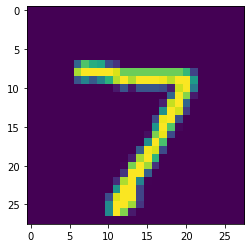

noisy image


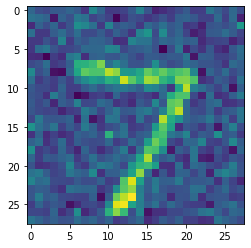

In [27]:
n = 0
print("original image")
plt.imshow(X_test[n])
plt.show()
print("noisy image")
plt.imshow(noisy[n])

In [28]:
import tensorflow as tf

In [29]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [30]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [31]:
noise_remover = Sequential([encoder, decoder])

In [32]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2201 - accuracy: 0.1338
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.2246
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.2419
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.2530
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.2605
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1084 - accuracy: 0.2656
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.2700
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.2720


In [34]:
ten_noisy_images = sample(X_test[:10], training=True)

In [35]:
denoised = noise_remover(ten_noisy_images)

original image


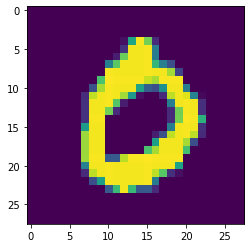

noisy image


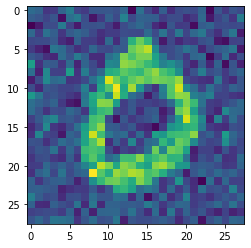

denoised image


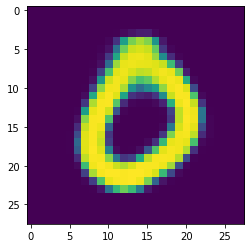

In [38]:
n = 3
print("original image")
plt.imshow(X_test[n])
plt.show()
print("noisy image")
plt.imshow(ten_noisy_images[n])
plt.show()
print("denoised image")
plt.imshow(denoised[n])